In [214]:
from google.colab import drive
drive.mount('/drive/',force_remount=True)

Mounted at /drive/


In [0]:
# path setting
import os
os.chdir('/drive/My Drive/Deep_Learning/faces')

In [336]:
# Location
ls

cross_board/                         images.jpg  mix/
female/                              img.jpg     x_cropped.npz
haarcascade_frontalface_default.xml  male/       y_cropped.npz


In [0]:
# Required Libraries

import numpy as np
import pandas as pd
import re
import cv2
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

#Misc for ignore warnings
import warnings
warnings.filterwarnings('ignore')

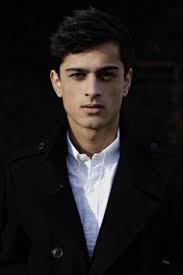

In [218]:
Image.open('male/1_ (369).jpeg')

In [0]:
#!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

In [0]:
# Adding haarcascade classifier for taking the front face
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
# taking random image from the male folder
img  = cv2.imread('male/1_ (369).jpeg')

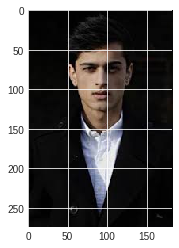

In [223]:
# Display
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [0]:
# converting it into Gray Sclae
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
# Tuning Classifier
face = haar.detectMultiScale(img_gray,scaleFactor=1.1,minNeighbors=1)

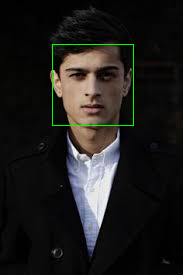

In [226]:
# Detecting Face
for (x, y, w, h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0))
cv2_imshow(img)

### I seperated the male and female image in their particular folder.

In [0]:
female = "female/"
male = "male/"

### Image Normalization

In [0]:
# Applying for loop for male images to label them as 1
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
for img in (os.listdir(male)):
  path = os.path.join(male, img)
  img = cv2.imread(path)
  img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  faces = haar.detectMultiScale(img_gray,scaleFactor=1.1, minNeighbors=1)

  for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi_color = img[y:y + h, x:x + w] 
    cv2.imwrite(str(w) + str(h) + '_1.jpg', roi_color)

In [0]:
# # Applying for loop for female images to label them as 0
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
for img in (os.listdir(female)):
  path = os.path.join(female, img)
  img = cv2.imread(path)
  img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  faces = haar.detectMultiScale(img_gray,scaleFactor=1.1, minNeighbors=1)

  for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi_color = img[y:y + h, x:x + w] 
    cv2.imwrite(str(w) + str(h) + '_0.jpg', roi_color)

### I moved all the labeled images into a new folder name 'mix'

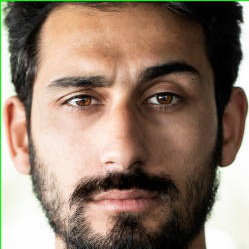

In [232]:
Image.open('./mix/249249_1.jpg')

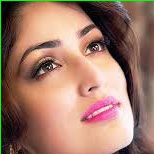

In [233]:
Image.open('./mix/154154_0.jpg')

##### As we can see the labeled has been defined 0-Female and 1-Male

In [0]:
## Changing the path to mix folder and applying all the operations
faces = "./mix"

#### Resizing all the images to 64x64 and converting them into array

In [0]:
face = []
image_size = 64
for image in (os.listdir(faces)):
  path = os.path.join(faces, image)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (image_size, image_size)).flatten()
  face.append(img)

In [236]:
X = np.array(face)   # X = independent variable
X.shape, X.flatten().shape

((305, 4096), (1249280,))

### Extracting the label from the image file name

In [237]:
os.path.splitext('154154_0.jpg')
label = os.path.splitext('154154_0.jpg')[0]
gen = label.partition("_")[2]
gen = int(gen)
gen, type(gen)

(0, int)

In [0]:
gen_y = []
for image in (os.listdir(faces)):
  os.path.splitext(image)
  label = os.path.splitext(image)[0]
  gen = label.partition("_")[2]
  gen = int(gen)
  gen_y.append(gen)

In [0]:
# gen_y

In [240]:
y = np.array(gen_y)  # y = dependent varibale
y.shape

(305,)

In [241]:
gen, count = np.unique(y, return_counts=True)
dict(zip(gen, count))

{0: 129, 1: 176}

In [242]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Saving into ZIP

In [0]:
np.savez_compressed('x_cropped.npz', X)
np.savez_compressed('y_cropped.npz', y)

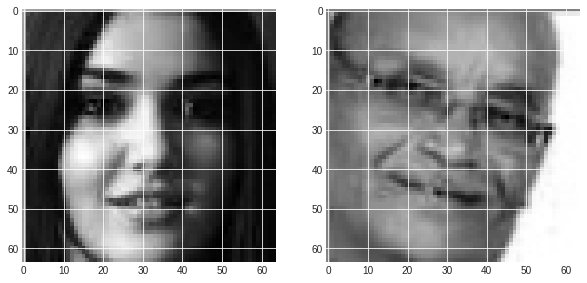

In [246]:
# Display the images we extracted
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
row = X[-11]
row_1 = row.reshape((image_size,image_size))
plt.imshow(row_1,cmap='gray');
plt.subplot(1,2,2)
row = X[2]
row_1 = row.reshape((image_size,image_size))
plt.imshow(row_1,cmap='gray');

In [247]:
X = np.load('x_cropped.npz')
X = X.f.arr_0
X.shape

(305, 4096)

In [248]:
y = np.load('y_cropped.npz')
y = y.f.arr_0
y.shape

(305,)

In [249]:
X

array([[ 74,  83,  82, ..., 217, 168, 145],
       [150, 151, 149, ..., 166, 181, 164],
       [149, 150, 149, ..., 255, 255, 255],
       ...,
       [140, 123, 122, ..., 186, 168, 149],
       [137, 129, 127, ..., 189, 194, 188],
       [119,  90,  71, ...,  12,  13,  21]], dtype=uint8)

In [250]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Train and Test

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train_reshape = x_train.reshape(-1,image_size,image_size,1)
x_test_reshape = x_test.reshape(-1,image_size,image_size,1)

In [253]:
## Shape of the model
x_train_reshape.shape, x_test_reshape.shape

((244, 64, 64, 1), (61, 64, 64, 1))

In [254]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
tf.__version__

'1.15.0'

In [0]:
# define CNN
def CNN():
  model = Sequential()
  model.add(Conv2D(filters=64,input_shape=(64,64,1),kernel_size =    
  (3,3),activation='relu',strides=   (1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Flatten())


  model.add(Dense(units=4096,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=2,activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
  return model

In [256]:
#def and print summary
cnn = CNN()
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 128)      

In [0]:
#saving for cross validation
cross_board = TensorBoard('cross_board')

In [259]:
#training with 10epochs and batch_size of 30
history = cnn.fit(x=x_train_reshape,y=y_train,batch_size=30,epochs=10,callbacks=[cross_board],validation_data=[x_test_reshape,y_test])

Train on 244 samples, validate on 61 samples
Epoch 1/10
244/244 [==============================] - 2s 8ms/sample - loss: 93.3121 - acc: 0.5369 - val_loss: 127.2961 - val_acc: 0.6066
Epoch 2/10
244/244 [==============================] - 0s 2ms/sample - loss: 71.4364 - acc: 0.5615 - val_loss: 66.9479 - val_acc: 0.6066
Epoch 3/10
244/244 [==============================] - 0s 2ms/sample - loss: 57.3251 - acc: 0.5533 - val_loss: 52.9982 - val_acc: 0.6066
Epoch 4/10
244/244 [==============================] - 0s 2ms/sample - loss: 46.2228 - acc: 0.6598 - val_loss: 45.6778 - val_acc: 0.6066
Epoch 5/10
244/244 [==============================] - 0s 2ms/sample - loss: 37.6141 - acc: 0.6721 - val_loss: 33.3617 - val_acc: 0.7377
Epoch 6/10
244/244 [==============================] - 0s 2ms/sample - loss: 30.8967 - acc: 0.7746 - val_loss: 27.9107 - val_acc: 0.6393
Epoch 7/10
244/244 [==============================] - 0s 2ms/sample - loss: 25.9018 - acc: 0.7951 - val_loss: 23.5541 - val_acc: 0.6885
Ep

In [0]:
#saving the history of loss so we can plot
data_loss_nn = pd.DataFrame(history.history)

In [0]:
#plot
# data_loss_nn[['loss','val_loss']].plot(kind='line');

### Model has been build, time to test the model

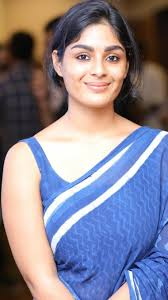

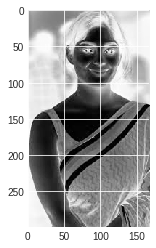

In [267]:
in_img = cv2.imread("./female/0_ (476).jpeg") # loading
gray = cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY) # converting into Gray Scale
cv2_imshow(in_img)
plt.imshow(gray);

### Now with help of Haarcascade model we will try to predict Male or Female

In [0]:
gender = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gender = gender.detectMultiScale(gray, 1.3  , 3)

Gender: female


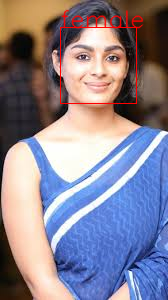

In [269]:
labels = ['female','male'] # I have taken label as Male and Female inspite of 0 and 1
for (x, y, w, h) in gender:
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F) #normalize
  cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
    
  yhat= cnn.predict(cropped_img)
        
  cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
  print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

### Our model detected female as female which seems good

##### Try few more

In [0]:
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = faces.detectMultiScale(gray, 1.3  , 3)

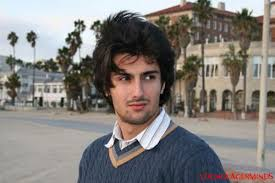

In [333]:
in_img = cv2.imread("./male/1_ (360).jpeg")
cv2_imshow(in_img)

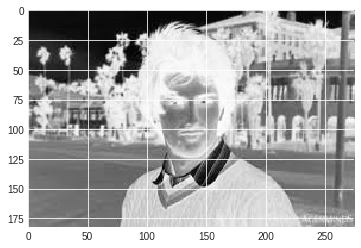

In [334]:

gray = cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

Gender: male


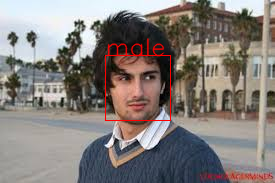

In [335]:
labels = ['female','male']
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
        yhat= cnn.predict(cropped_img)
        cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
        print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

#### Let's try some group images

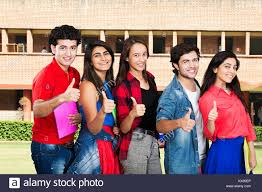

In [292]:
in_img = cv2.imread("./images.jpg")
cv2_imshow(in_img)

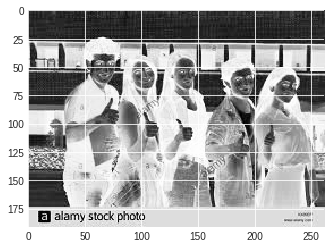

In [293]:

gray = cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

In [0]:
group = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
group = group.detectMultiScale(gray, 1.1  , 5)


Gender: male
Gender: female
Gender: male
Gender: male


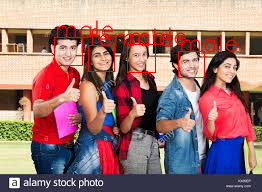

In [295]:
labels = ['female','male']
for (x, y, w, h) in group:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
        yhat= cnn.predict(cropped_img)
        cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
        print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

### Detected male as Male and Female as Female....